<a href="https://colab.research.google.com/github/DavidGoing/PHYS3151-Machine-Learning-in-Physics-2024/blob/main/principal-component-analysis/Ising_model/Ising_model_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component analysis for Ising model

# Ising model

The Ising model is named after Ernst Ising, Ph.D. in Physics (1924) from the University of Hamburg under the supervision of Wilhelm Lenz. Ising solved the one-dimensional (1D) Ising model exactly to find no phase transition at finite temperature. He also tried to provide arguments on why there would not be a phase transition in higher dimensions either. In 1936, Peierls argued that both 2D and 3D Ising models admit phase transitions. And in 1944, Lars Onsager solved the 2D square lattice Ising model and analytically showed that the system undergoes a second order phase transition at the critical temperature $T_c = 2J/\ln(1+\sqrt{2}) ∼ 2.269 J$ (usually we take $J=1$). For temperatures less than $T_c$, the system magnetizes, and the state is called the ferromagnetic or the ordered state. This amounts to a globally ordered state due to the presence of local interactions between the spin. For temperatures greater than Tc, the system is in the disordered or the paramagnetic state. In this case, there are no long-range correlations between the spins.

The Ising model plays a central role in the theory of phase transitions. It is a mathematical model of ferromagnetism (for example, iron can be magnetized in a magnetic field, but if heated, it loses magnetization beyond Curie temperature).

The Ising Hamiltonian can be written as,

$$
\mathcal{H} = -J \sum_{\langle i j \rangle} S_{i} S_{j}.  
$$

* The spins $S_{i}$ can take values $\pm 1$,
*  $\langle i j \rangle$ implies nearest-neighbor interaction only,
* $J>0$ is the strength of exchange interaction.

The system undergoes a second order phase transition at the critical temperature $T_{c}$. For temperatures less than $T_{c}$, the system magnetizes, and the state is called the ferromagnetic or the ordered state. This amounts to a globally ordered state due to the presence of local interactions between the spin. For temperatures greater than $T_{c}$, the system is in the disordered or the paramagnetic state. In this case, there are no long-range correlations between the spins.

The total magnetization
$$
M =|\frac{1}{N}\sum_i S_i |
$$
The specific heat
$$
C=\frac{1}{N}\frac{1}{T}(⟨E^2⟩−⟨E⟩^2)
$$
The susceptibility
$$
\chi=\frac{1}{N}\frac{1}{T}(⟨M^2⟩−⟨|M|⟩^2)
$$

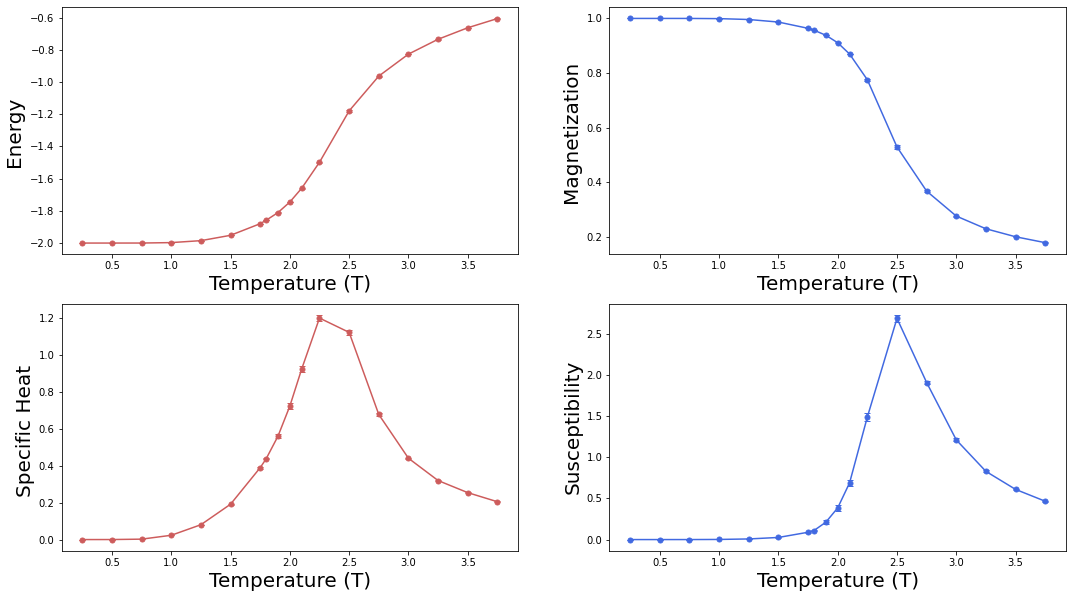

1. The quantities on the y-axis, in the above plots, are per spin. These intensive quantities have been plotted against temperature on the x-axis. It can be seen that the critical temperature for the numerical simulation of this small system is close to the known value of $T_c\sim2.269$ for a thermodynamic system.

# PCA

We now explore how to cluster the Ising dataset and visualize the results using PCA.


Firstly, 50000 configurations per temperature value were generated via Monte Carlo simulation of 2D Ising model using the [Metropolis algorithm](https://phas.ubc.ca/~berciu/TEACHING/PHYS503/PROJECTS/05_dominic.pdf). Here the system size is $10\times 10$, temperatures from 0.25 to 4.0.
<br>

<br>Then, we randomly choose 5000 samples from above data. The PCA was fed a matrix $X$ in which each of the rows is a configuration sample for a given temperature (the spin values are just aligned in a row vector and put together to create $X$).

Now we load the Ising dataset

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
!git clone https://github.com/DavidGoing/PHYS3151-Machine-Learning-in-Physics-2024

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2024'...
remote: Enumerating objects: 777, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 777 (delta 200), reused 234 (delta 135), pack-reused 417
Receiving objects: 100% (777/777), 36.94 MiB | 18.63 MiB/s, done.
Resolving deltas: 100% (417/417), done.


In [2]:
# spin configurations
df1 = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2024/principal-component-analysis/Ising_model/conf.csv",header=None)
# temperature
df2 = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2024/principal-component-analysis/Ising_model/temp.csv",header=None)
df1 = df1.to_numpy()
df2 = df2.to_numpy()
x = df1
t = df2
t = t.T
print(x)
print(x.shape)
print(t.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5000, 100)
(1, 5000)


we calculate the matrix $Z$

In [13]:
z = np.zeros((5000,100))
x_mean = np.mean(x,axis=0)
x_var = np.var(x,axis=0)
x_std = np.std(x,axis=0,ddof=0)
print(x_mean.shape,x_std.shape)
for i in range(100):
  z[:,i]=(x_mean[i]-x[:,i])/x_std[i]

print(z)
print(z.shape)

(100,) (100,)
[[ 0.86113499  0.84538609  0.86642962 ...  0.87174749  0.8537607
   0.86855395]
 [ 0.86113499  0.84538609  0.86642962 ...  0.87174749 -1.1712884
  -1.15133896]
 [ 0.86113499  0.84538609  0.86642962 ...  0.87174749  0.8537607
   0.86855395]
 ...
 [ 0.86113499  0.84538609  0.86642962 ...  0.87174749  0.8537607
   0.86855395]
 [ 0.86113499  0.84538609  0.86642962 ...  0.87174749  0.8537607
   0.86855395]
 [ 0.86113499  0.84538609  0.86642962 ...  0.87174749  0.8537607
   0.86855395]]
(5000, 100)


## Covariance Matrix

The first step in PCA is establishing the covariance matrix of the design matrix.

In [14]:
cov = np.cov(z,rowvar=False)
print(cov.shape)
print(cov)

(100, 100)
[[1.00020004 0.69307107 0.59353768 ... 0.55677843 0.56726186 0.62720014]
 [0.69307107 1.00020004 0.68158928 ... 0.53499676 0.54259702 0.56866561]
 [0.59353768 0.68158928 1.00020004 ... 0.54854895 0.54439119 0.54707942]
 ...
 [0.55677843 0.53499676 0.54854895 ... 1.00020004 0.69577754 0.59926917]
 [0.56726186 0.54259702 0.54439119 ... 0.69577754 1.00020004 0.70332647]
 [0.62720014 0.56866561 0.54707942 ... 0.59926917 0.70332647 1.00020004]]


Here, the cov function from the numpy package is used, functionally it is exactly the same as performing the operation 'manually' using the numpy matrix operations. A covariance matrix is the matrix $Z^T Z$. However it is slightly easier to simply use the numpy function since it reduces the step of having to convert the pandas dataframe into a numpy array. The covariance matrix shows whether the features are positively correlated (postive $C_{ij}$) or negatively correlated (negative $C_{ij}$). And since the features are regularized, it also shows how strongly correlated they are (The greater $|C_{ij}|$ is the more strongly correlated the features are.)

In [15]:
x5 = np.array([[0, 2], [1, 1], [2, 0]]).T

print(x5)

print(np.cov(x5))

print(np.cov(x5,rowvar=False))


[[0 1 2]
 [2 1 0]]
[[ 1. -1.]
 [-1.  1.]]
[[ 2.  0. -2.]
 [ 0.  0.  0.]
 [-2.  0.  2.]]


## Singular Value Decomposition

After getting the covariance matrix, we want to get its eigenvectors.Here, we use svd.
<br>For the svd here: $$covariance\ matirx = U.S.V^*$$
<br>S is a diagonal matrix and U is a unitary matrix whose columns are exactly the u vectors we want.  Actually, u vectors signify the new planes to which we will project our data sample.<br> <br>Therefore, to reduce a system from n-dimensions to k-dimensions, just take the first k-vectors from U (first k columns).

In [16]:
from numpy import linalg as la
U,sigma,VT=la.svd(cov)
# sigma is eigenvalue, U is eigenvector
print(sigma)
print(U.shape)
#print(U)

[56.43412729  1.95133663  1.92366034  1.8208709   1.7479304   1.22905562
  1.20301694  1.16688204  1.14273255  0.83348705  0.79739953  0.77798705
  0.75668371  0.70740939  0.69093222  0.67320673  0.65770788  0.62218621
  0.61956258  0.61244866  0.59034093  0.49999427  0.48909306  0.47439051
  0.46165017  0.45790802  0.45297704  0.444571    0.44259854  0.43592068
  0.42945582  0.42226056  0.41129114  0.40456389  0.40259203  0.38996425
  0.38439354  0.379545    0.36689511  0.36553678  0.36069137  0.35664368
  0.35020684  0.34402558  0.34057237  0.33588331  0.33166212  0.32973566
  0.32599305  0.32289664  0.32086358  0.31661067  0.31340463  0.30831025
  0.30563999  0.30117506  0.29817999  0.29433342  0.29035289  0.28315184
  0.27794692  0.27229553  0.27064514  0.26529304  0.26281784  0.25941478
  0.2582133   0.25312436  0.24929036  0.24825764  0.24465983  0.24106496
  0.236526    0.23242072  0.22754402  0.22363281  0.22099424  0.21668106
  0.21369609  0.21204312  0.20818133  0.20697807  0

Text(0.5, 1.0, 'Eigenvalue of covarance matrix')

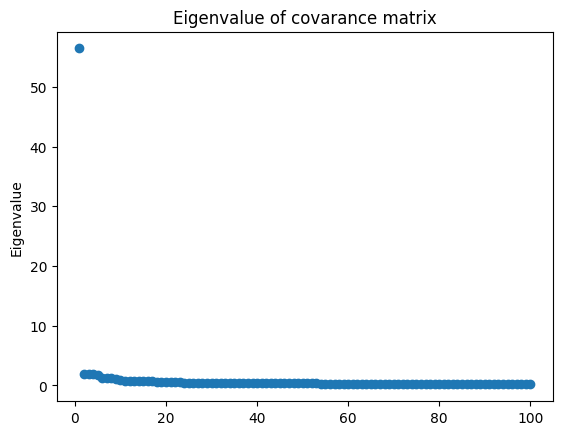

In [17]:
n = []
for i in range(1,101):
  n.append(i)
plt.scatter(n[0:100],sigma[0:100])
plt.ylabel("Eigenvalue")
plt.title("Eigenvalue of covarance matrix")

## Principal Components

To get the reduced system is to transform every $x$ of example in design matrix $X$ into $z$, which is: X_reduced=X.U_reduced, with the dimensions (X: 5000 x 100,U_reduced: 100 x Dimension, X_reduced: 5000 x Dimension).
<br>So we design a function here to get the reduced system and also show the ratio of information(variance) kept.

In [18]:
def reduce_system(U,dimension):
    U_reduced=U[ : , :dimension]
    reduced_vec=np.dot(z,U_reduced)
    var=np.sum(sigma[:dimension])/np.sum(sigma[:])
    return reduced_vec,var

we project the data onto the first two components, which means dimension=2. And plot our dimensionally reduced data.

[[-8.65268616e+00 -5.97768336e-03]
 [ 6.39125200e-01 -2.47737156e+00]
 [-8.45173442e+00  3.31299248e-01]
 ...
 [-1.70000567e-01 -3.15012844e+00]
 [-1.16849194e+00 -5.15451575e-02]
 [-8.65268616e+00 -5.97768336e-03]]


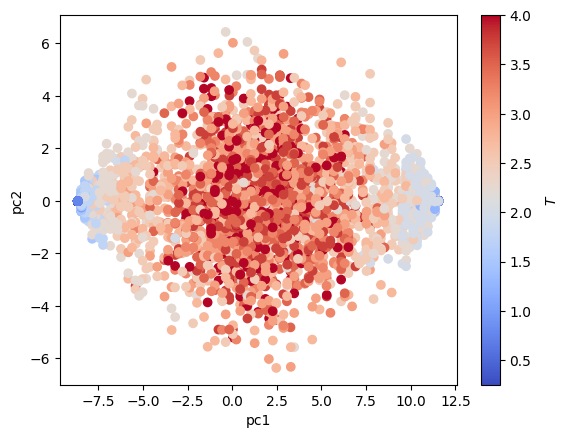

In [19]:
reducevec, vari = reduce_system(U,2)
print(reducevec)
plt.scatter(reducevec[:,0],reducevec[:,1],c=t,cmap="coolwarm")
plt.xlabel('pc1')
plt.ylabel('pc2')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=10)

## Discussion

Looking at the projection of the data in the two main principal components we immediately see three distinct clusters: one for high temperature and two for low temperature. This hints that the clusters for low temperature correspond to the two possible alignments of the groundstate of the Ising model for $T < Tc$ (all up, or all down). In fact the weights of the first principal component are approximately constant in every lattice site. Since the weight vector is normalized, this means that the first principal component is proportional to the total magnetization of the system.

The sublattice magnetization

$$ m = \frac{1}{N}\sum_i S_i $$

for this system is the average magnetization. The order parameter distinguishes the two phases realized by the systems. It is zero in the disordered state, while non-zero in the ordered, ferromagnetic, state.

We can check the reduced eigenvector:

[[-0.10033872 -0.09106259]
 [-0.09925296 -0.13360565]
 [-0.0996954  -0.17042577]
 [-0.09949203 -0.21176155]
 [-0.10038777 -0.18982199]
 [-0.10088788 -0.15125361]
 [-0.10046348 -0.10300638]
 [-0.10035558 -0.0349078 ]
 [-0.09941276 -0.01091918]
 [-0.09948507 -0.02764302]
 [-0.10077672 -0.07437531]
 [-0.09943943 -0.12588116]
 [-0.09946921 -0.16694889]
 [-0.10058292 -0.18466567]
 [-0.10011613 -0.16685413]
 [-0.10004922 -0.13421531]
 [-0.09979075 -0.07213438]
 [-0.09918019 -0.04146592]
 [-0.10005403 -0.00795266]
 [-0.09995197 -0.01652622]
 [-0.09955969  0.00254039]
 [-0.09969143 -0.07497455]
 [-0.10024949 -0.12077713]
 [-0.09998404 -0.13272052]
 [-0.09891048 -0.12016711]
 [-0.09786979 -0.08173943]
 [-0.10022342 -0.03775963]
 [-0.09903151  0.00352277]
 [-0.10026158  0.03856296]
 [-0.09990589  0.03876499]
 [-0.10086603  0.0360692 ]
 [-0.09958191 -0.00157689]
 [-0.10002673 -0.04041968]
 [-0.10021744 -0.05908723]
 [-0.10008293 -0.07297883]
 [-0.09960122 -0.01884063]
 [-0.09995916  0.02286205]
 

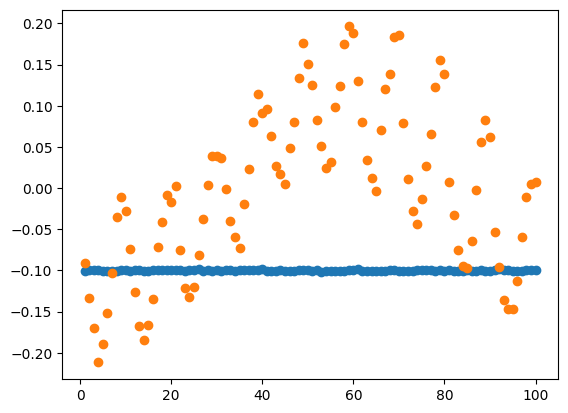

In [20]:
print(U[:,0:2])
plt.scatter(n,U[:,0])
plt.scatter(n,U[:,1])

The weights of the first component for every lattice site around $-0.1$. So in the low temperature region (ordered phase), each spin equals to $1$ or $-1$, the first component equals to $10$ or $-10$. And for the weights of the second component, half of them are positive and others are negative, so the second component is around $0$.

We also can use PCA from sklearn package.

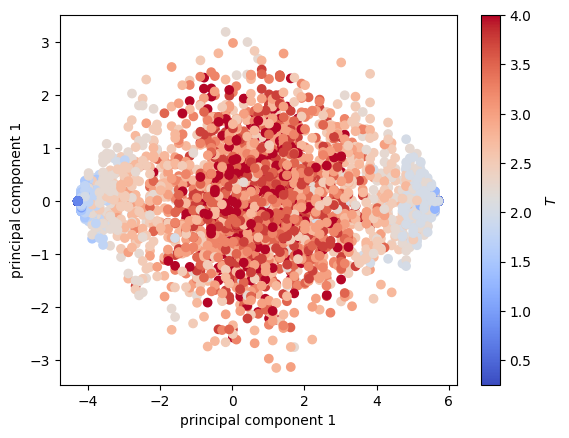

[[-4.28134908e+00 -2.91061114e-03]
 [ 3.14480627e-01 -1.22566861e+00]
 [-4.18183721e+00  1.64362900e-01]
 ...
 [-8.49938516e-02 -1.55536737e+00]
 [-5.78572311e-01 -2.44126129e-02]
 [-4.28134908e+00 -2.91061114e-03]]


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=t,cmap="coolwarm")
plt.xlabel('principal component 1')
plt.ylabel('principal component 1')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=10)
plt.show()
print(principalComponents)

 We can plot the variance loss against the dimensions

Text(0.5, 1.0, 'Dimensions vs variance')

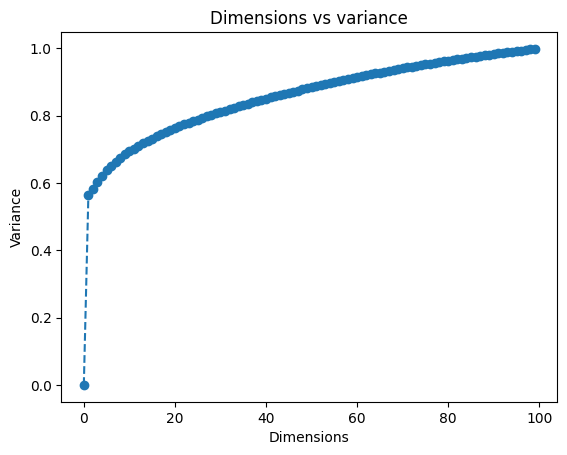

In [22]:
dimensions = []
variance = []
for i in range(100):
    reducevec, vari = reduce_system(U,i)
    dimensions.append(i)
    variance.append(vari)

plt.plot(dimensions,variance,marker='o',ls='--')
plt.xlabel("Dimensions")
plt.ylabel("Variance")
plt.title("Dimensions vs variance")

In datasets with very large amounts of dimensions ($10\times 10$), using PCA can reduce a huge amount of dimensions without too much loss of information.

For $40\times 40$ systems, PCA gives us

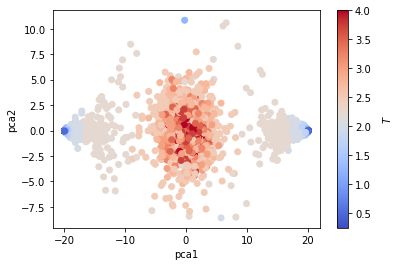

where the ordered phase and disordered phase are dispersed more clearly. You can check detailed [code](https://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB15-CXII-clustering.html) and [discussion](https://www.uu.nl/sites/default/files/antonio_rebelo.pdf).